<a href="https://colab.research.google.com/github/LeninGF/japanese_vs_french/blob/master/JapaneseVsFrench_trian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
train = np.genfromtxt('training.csv', delimiter=',')
test = np.genfromtxt('testing.csv', delimiter=',')

In [4]:
total_train_samples, _ = np.shape(train)
total_test_samples, _ = np.shape(test)
total = total_train_samples+total_test_samples
print('total {}'.format(total))
print('% train is: {}'.format(total_train_samples/total))
print('% test is: {}'.format(total_test_samples/total))

total 102996
% train is: 0.6999883490620995
% test is: 0.3000116509379005


In [5]:
x_train = train[:,:-1]
y_train = train[:,-1]
x_test = test[:,:-1]
y_test = test[:,-1]
print(np.shape(x_train))
print(np.shape(y_train))

(72096, 144)
(72096,)


In [0]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))
x_train_sc = sc.fit_transform(x_train)
x_test_sc = sc.fit_transform(x_test)

In [0]:
from sklearn.utils import shuffle
x_train_sh, y_train_sh = shuffle(x_train_sc, y_train, random_state=0)

In [8]:
x_train.shape[1]

144

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
number_of_features = x_train.shape[1]
model = Sequential()
model.add(Dense(10, input_dim=number_of_features, activation='relu'))
# model.add(Dense(50, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                1450      
_________________________________________________________________
dropout (Dropout)            (None, 10)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 1,461
Trainable params: 1,461
Non-trainable params: 0
_________________________________________________________________


In [11]:
history = model.fit(x_train_sh, y_train_sh, epochs=10, batch_size=10, verbose=1)

Train on 72096 samples
Epoch 1/10
72096/72096 [==============================] - 21s 285us/sample - loss: 0.0469 - acc: 0.9888
Epoch 2/10
72096/72096 [==============================] - 19s 270us/sample - loss: 0.0214 - acc: 0.9959
Epoch 3/10
72096/72096 [==============================] - 19s 258us/sample - loss: 0.0164 - acc: 0.9960
Epoch 4/10
72096/72096 [==============================] - 19s 260us/sample - loss: 0.0142 - acc: 0.9964
Epoch 5/10
72096/72096 [==============================] - 18s 255us/sample - loss: 0.0141 - acc: 0.9965
Epoch 6/10
72096/72096 [==============================] - 18s 254us/sample - loss: 0.0129 - acc: 0.9969
Epoch 7/10
72096/72096 [==============================] - 19s 259us/sample - loss: 0.0122 - acc: 0.9970
Epoch 8/10
72096/72096 [==============================] - 18s 255us/sample - loss: 0.0111 - acc: 0.9974
Epoch 9/10
72096/72096 [==============================] - 18s 248us/sample - loss: 0.0107 - acc: 0.9974
Epoch 10/10
72096/72096 [================

In [0]:
model.save('model_fr_jp.h5')

Text(0.5, 1.0, 'Training Accuracy')

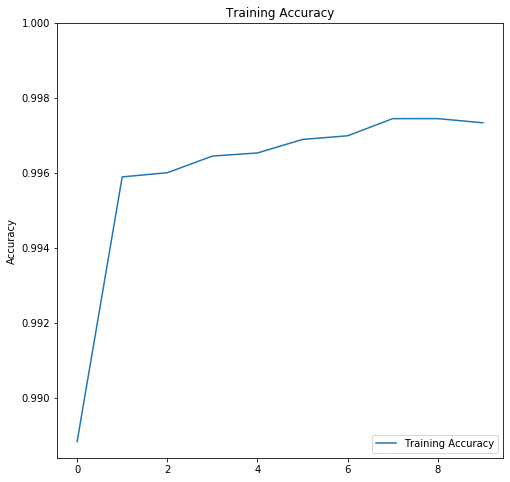

In [13]:
import matplotlib.pyplot as plt
acc = history.history['acc']
loss = history.history['loss']
plt.figure(figsize=(8, 8))
plt.plot(acc, label='Training Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()), 1])
plt.title('Training Accuracy')


Text(0.5, 1.0, 'Training Loss')

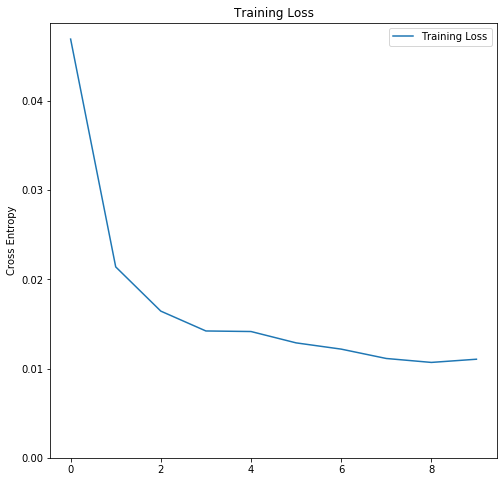

In [14]:
plt.figure(figsize=(8, 8))
plt.plot(loss, label='Training Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0, max(plt.ylim())])
plt.title('Training Loss')

## Testeo del Modelo
1. Cargar el model h5
2. evaluar el modelo h5 sobre el **x_test**

In [15]:
from tensorflow.keras.models import load_model
model2 = load_model('model_fr_jp.h5')
model2.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                1450      
_________________________________________________________________
dropout (Dropout)            (None, 10)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 1,461
Trainable params: 1,461
Non-trainable params: 0
_________________________________________________________________


In [16]:
loss_test, acc_test = model2.evaluate(x=x_test_sc, y=y_test,verbose=1)
print('test accuracy is {:.4f}'.format(acc_test))
print('test loss is {:.4f}'.format(loss_test))

30900/30900 [==============================] - 2s 53us/sample - loss: 0.0122 - acc: 0.9978
test accuracy is 0.9978
test loss is 0.0122


In [17]:
from sklearn.metrics import confusion_matrix, classification_report
y_predict = model2.predict_classes(x_test_sc)
cm = confusion_matrix(y_test, y_predict)
print(cm)

[[ 5786    19]
 [   50 25045]]


In [18]:
print(classification_report(y_true=y_test, y_pred=y_predict, target_names=["French", "Japanese"]))

              precision    recall  f1-score   support

      French       0.99      1.00      0.99      5805
    Japanese       1.00      1.00      1.00     25095

    accuracy                           1.00     30900
   macro avg       1.00      1.00      1.00     30900
weighted avg       1.00      1.00      1.00     30900



In [19]:
train_loss, train_acc = model2.evaluate(x=x_train_sc, y=y_train, verbose=1)
test_loss, test_acc = model2.evaluate(x=x_test_sc, y=y_test, verbose=1)

30900/30900 [==============================] - 1s 44us/sample - loss: 0.0122 - acc: 0.9978
